Spam SMS Detection

In [ ]:
# Objective -- Build an AI model to classify SMS messages as spam or legitimate using TF-IDF and classifiers
#              ( Naive Bayes, Logistic Regression, SVM )

In [2]:
# Step 1 :- Import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re

In [4]:
# Step 2 :- Load dataset

try:
    data = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: 'spam.csv' not found.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

In [6]:
# Step 3 :- Data Exploration

# Rename columns and drop unnecessary ones
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
print("### Data Exploration ###")
print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Label Distribution:\n", data['label'].value_counts(normalize=True))
print("Missing Values:\n", data.isnull().sum())

### Data Exploration ###
Dataset Shape: (5572, 2)
Columns: ['label', 'message']
Label Distribution:
 label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64
Missing Values:
 label      0
message    0
dtype: int64


In [8]:
%matplotlib inline

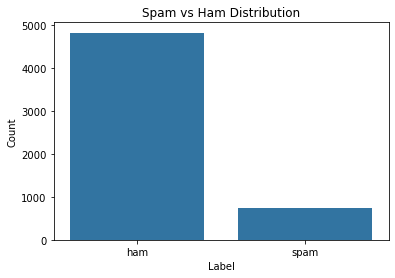

In [10]:
# Visualize label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Step 4 :- Data Preprocessing

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

data['message'] = data['message'].apply(clean_text)
data = data.dropna(subset=['message', 'label'])
print("\nShape after preprocessing:", data.shape)

# Encode labels (ham=0, spam=1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Features and target
X = data['message']
y = data['label']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
try:
    X_tfidf = vectorizer.fit_transform(X)
except Exception as e:
    print(f"Error in TF-IDF transformation: {e}")
    exit()
print("TF-IDF Matrix Shape:", X_tfidf.shape)


Shape after preprocessing: (5572, 2)
TF-IDF Matrix Shape: (5572, 5000)


In [14]:
# Step 5 :- Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (4457, 5000)
Test Set Shape: (1115, 5000)


In [16]:
%matplotlib inline


### Naive Bayes ###
Training Completed
Accuracy: 0.9713
Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       965
        Spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



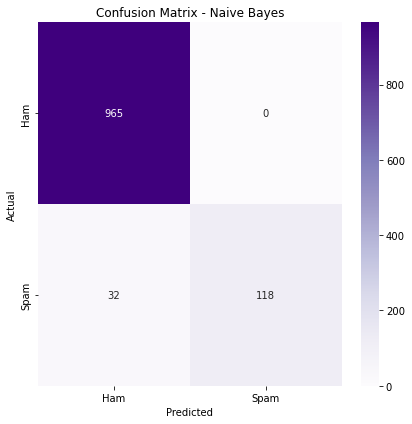

Model saved as 'spam_naive_bayes_model.pkl'

### Logistic Regression ###
Training Completed
Accuracy: 0.9749
Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.92      0.89      0.90       150

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.97      0.97      0.97      1115



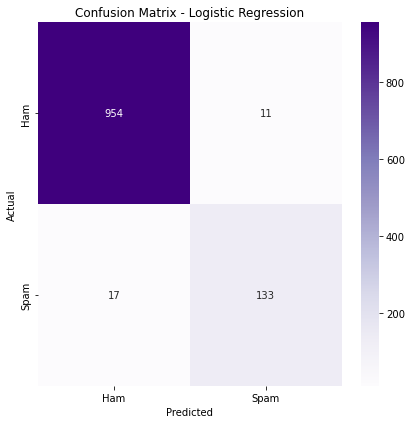

Model saved as 'spam_logistic_regression_model.pkl'

### SVM ###
Training Completed
Accuracy: 0.9794
Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       965
        Spam       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



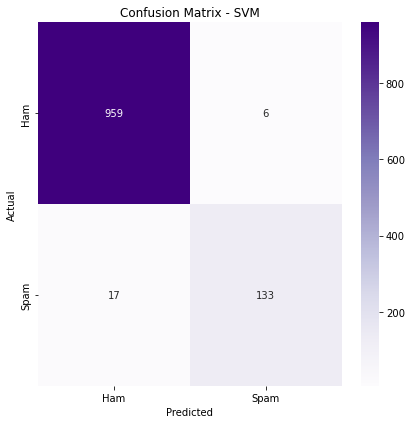

Model saved as 'spam_svm_model.pkl'


In [18]:
# Step 6 :- Model Training and Evaluation

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42)
}

for model_name, model in models.items():
    print(f"\n### {model_name} ###")
    # Train
    try:
        model.fit(X_train, y_train)
        print("Training Completed")
    except Exception as e:
        print(f"Error training {model_name}: {e}")
        continue

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", round(accuracy, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Save model
    joblib.dump(model, f'spam_{model_name.lower().replace(" ", "_")}_model.pkl')
    print(f"Model saved as 'spam_{model_name.lower().replace(' ', '_')}_model.pkl'")

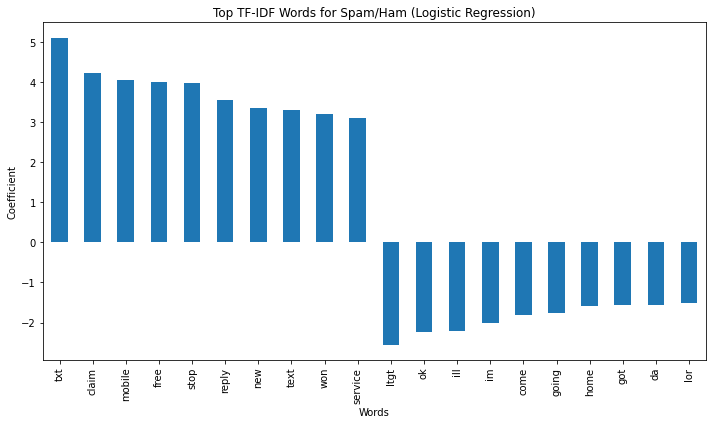

Top 10 Spam Words:
 txt        5.103904
claim      4.232037
mobile     4.058121
free       4.001339
stop       3.986975
reply      3.542261
new        3.340750
text       3.311672
won        3.194935
service    3.093601
dtype: float64
Top 10 Ham Words:
 ltgt    -2.550603
ok      -2.240917
ill     -2.204351
im      -2.011003
come    -1.804664
going   -1.756848
home    -1.581361
got     -1.573794
da      -1.557357
lor     -1.507036
dtype: float64


In [20]:
# Step 7 :- Feature Importance (TF-IDF Weights for Logistic Regression)

logreg_model = models['Logistic Regression']
coef = pd.Series(logreg_model.coef_[0], index=vectorizer.get_feature_names_out())
top_words = pd.concat([coef.nlargest(10), coef.nsmallest(10)])
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.title('Top TF-IDF Words for Spam/Ham (Logistic Regression)')
plt.xlabel('Words')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

print("Top 10 Spam Words:\n", coef.nlargest(10))
print("Top 10 Ham Words:\n", coef.nsmallest(10))

In [22]:
# Step 8 :- Example Prediction (using SVM)

svm_model = joblib.load('spam_svm_model.pkl')
sample_messages = [
    "Win a free iPhone now! Click here to claim!",
    "Hey, let's meet for coffee tomorrow."
]
sample_tfidf = vectorizer.transform(sample_messages)
predictions = svm_model.predict(sample_tfidf)
print("\n### Example Predictions (SVM) ###")
for msg, pred in zip(sample_messages, predictions):
    print(f"Message: {msg}")
    print(f"Predicted: {'Spam' if pred == 1 else 'Ham'}\n")


### Example Predictions (SVM) ###
Message: Win a free iPhone now! Click here to claim!
Predicted: Spam

Message: Hey, let's meet for coffee tomorrow.
Predicted: Ham



In [24]:
# Step 9 :- Save Vectorizer

joblib.dump(vectorizer, 'spam_tfidf_vectorizer.pkl')
print("Vectorizer saved as 'spam_tfidf_vectorizer.pkl'")

Vectorizer saved as 'spam_tfidf_vectorizer.pkl'
